In [722]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [723]:
# Read CSV
df = pd.read_csv("loan.csv",low_memory=False)

In [724]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [725]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [726]:
df.shape

(39717, 111)

In [727]:
# checking of percentage of null values for all coumns
round(df.isnull().sum(axis = 0)/len(df), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [728]:
# Remving all columns what have 100% Null values
df.dropna(how='all', axis=1, inplace=True)

In [729]:
# checking for null values again
round(df.isnull().sum(axis = 0)/len(df), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

Columns with null values based on percentage
1. desc - 33.0
2. mths_since_last_delinq - 65.0
3. mths_since_last_record - 93.0
4. next_pymnt_d - 97.0
5. pub_rec_bankruptcies - 2.0
Those columns that have null values more than 30% can be dropped


In [730]:
df = df.loc[:, df.isnull().mean() < 0.3]

In [731]:
# checking for null values again
round(df.isnull().sum(axis = 0)/len(df), 2)*100

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

In [732]:
# checking for null values again
round(df.isnull().sum(axis = 0)/len(df), 2)*100

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

emp_title                     6.0
emp_length                    3.0
These two columns have some missing values which is very less

In [733]:
# Check the most frequently occuring value in emp_title
df['emp_title'].mode()

0    US Army
Name: emp_title, dtype: object

In [734]:
# Since missing percentage is very less using mode to replace missing values is reasonable
df['emp_title'].fillna(df['emp_title'].mode()[0], inplace=True)

In [735]:
df['emp_title'].isnull().values.any()

False

According to data dictionary of column emp_length -> Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. So we need to fix this column 

In [736]:
df['emp_length'] = df['emp_length'].str.rstrip('years ').str.rstrip('year ')
df['emp_length'].replace({'10+': '10'}, inplace=True)
df['emp_length'].replace({'< 1': '0'}, inplace=True)

In [737]:
# dropping rows that have null values in emp_length
df.dropna(subset=['emp_length'], inplace=True)

In [738]:
df['emp_length'].head()

0    10
1     0
2    10
3    10
4     1
Name: emp_length, dtype: object

In [739]:
df['emp_length'].tail()

39712    4
39713    3
39714    0
39715    0
39716    0
Name: emp_length, dtype: object

In [740]:
# It is better to have column which is year as int
df['emp_length'] = df['emp_length'].astype('int')

In [741]:
# lets check for unique values
df.nunique()

id                            38642
member_id                     38642
loan_amnt                       880
funded_amnt                    1038
funded_amnt_inv                8097
term                              2
int_rate                        371
installment                   15149
grade                             7
sub_grade                        35
emp_title                     28775
emp_length                       11
home_ownership                    5
annual_inc                     5100
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           38642
purpose                          14
title                         19148
zip_code                        822
addr_state                       50
dti                            2863
delinq_2yrs                      11
earliest_cr_line                515
inq_last_6mths                    9
open_acc                    

In [742]:
# If there are unique values our analysis will be biased and will not make sense. So removing all unique values
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)
        

In [743]:
df.nunique()

id                            38642
member_id                     38642
loan_amnt                       880
funded_amnt                    1038
funded_amnt_inv                8097
term                              2
int_rate                        371
installment                   15149
grade                             7
sub_grade                        35
emp_title                     28775
emp_length                       11
home_ownership                    5
annual_inc                     5100
verification_status               3
issue_d                          55
loan_status                       3
url                           38642
purpose                          14
title                         19148
zip_code                        822
addr_state                       50
dti                            2863
delinq_2yrs                      11
earliest_cr_line                515
inq_last_6mths                    9
open_acc                         40
pub_rec                     

Removing columns that don't affect analysis of loan lending
 1.  id
 2.  member_id
 3.  url
 4.  zip_code
 5.  collections_12_mths_ex_med
 6. chargeoff_within_12_mths
 7. tax_liens
 8. title
 9. total_rec_prncp
 10. total_rec_int
 11. total_rec_late_fee
 12. recoveries
 13. collection_recovery_fee
 14. last_pymnt_amnt
 15. revol_bal
 16. out_prncp_inv
 17. out_prnc
 18. delinq_2yrs
 19. earliest_cr_line
 20. inq_last_6mths
 21. open_acc
 22. pub_rec
 23. revol_util
 24. total_acc
 25. total_pymnt
 26. total_pymnt_inv
 27. last_pymnt_d
 28. last_credit_pull_d



In [744]:
df.drop(labels = ['id', 'member_id', 'url', 'zip_code', 
                    'collections_12_mths_ex_med', 
                    'chargeoff_within_12_mths', 'tax_liens', 'title', 'total_rec_prncp', 
                    'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                    'last_pymnt_amnt','revol_bal','out_prncp', 'out_prncp_inv','delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'last_pymnt_d', 'last_credit_pull_d'],
          axis = 1, inplace = True
         )

In [745]:
df.shape

(38642, 19)

In [746]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [747]:
# current loan  status is not needed as it is neither loan repaid or defaulted
df.drop(df[df['loan_status'] == 'Current'].index, inplace = True)

In [748]:
# interest rate column has %
df['int_rate'] = df.int_rate.str.strip('%').astype(float)

In [749]:
# remove months and change to int ty
df['term'] = df['term'].apply(lambda x : int(x[:-7]))

# Univariate Analysis

On Loan amount

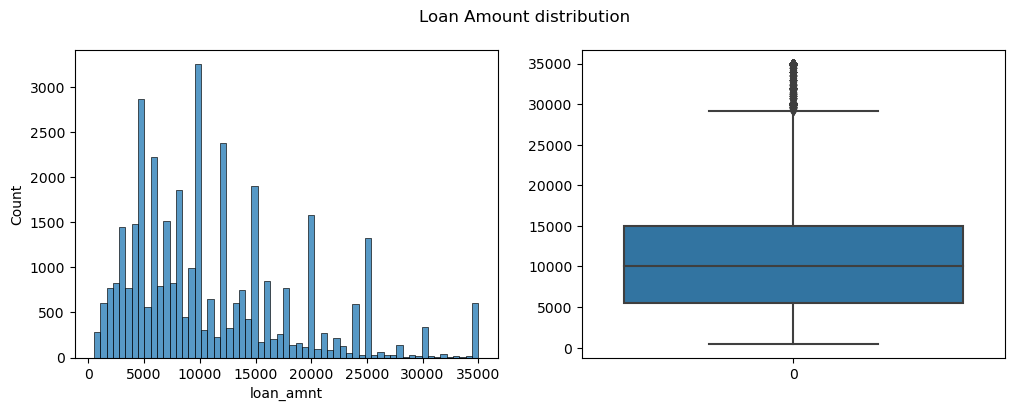

In [750]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.histplot(df["loan_amnt"])
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=df.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

Observations : The highest number of times the loan amount taken is 10000 and vert few people took loan amount of 30000 and above

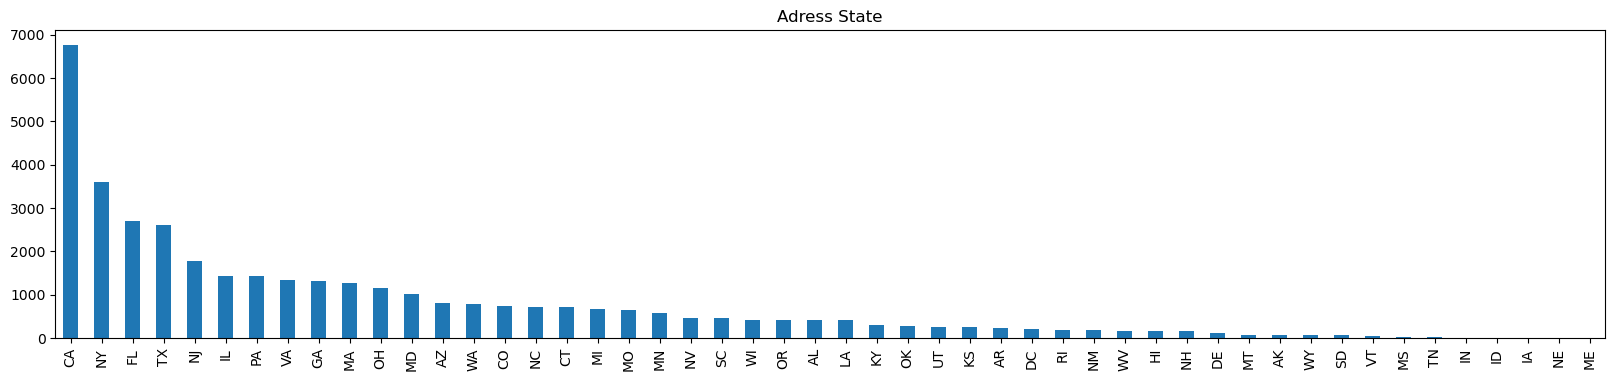

In [751]:
#Increasing the figure size of plot
plt.figure(figsize=(20,4))
#bar plot
df['addr_state'].value_counts().plot(kind='bar')
plt.title("Adress State")
plt.show()

Most number of loean borrowers are from state CA.

Univariate Analysif on funded amount


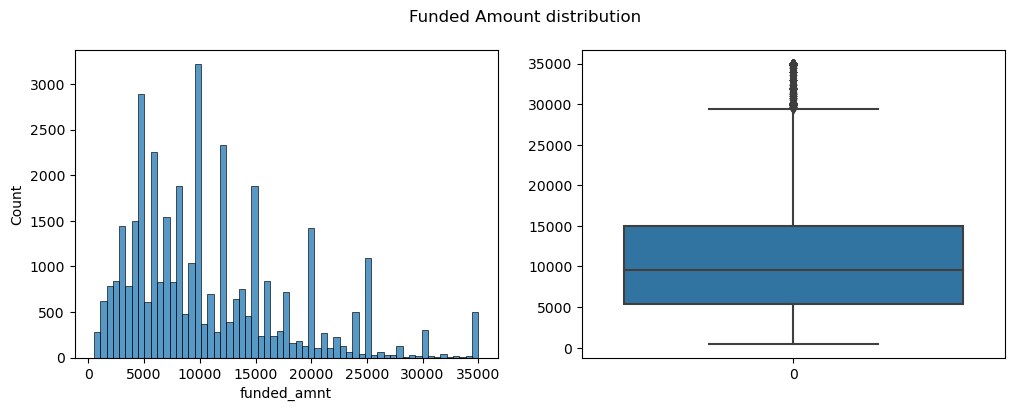

In [752]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.histplot(df["funded_amnt"])
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=df.funded_amnt)
#Single title for both subplots.
plt.suptitle('Funded Amount distribution')
plt.show()

Observations: It looks the same as above. 10000 is the amount that is given as loan most times Again 30000 loan amount is given very few times


Univariate Analysis on funded amount by investors


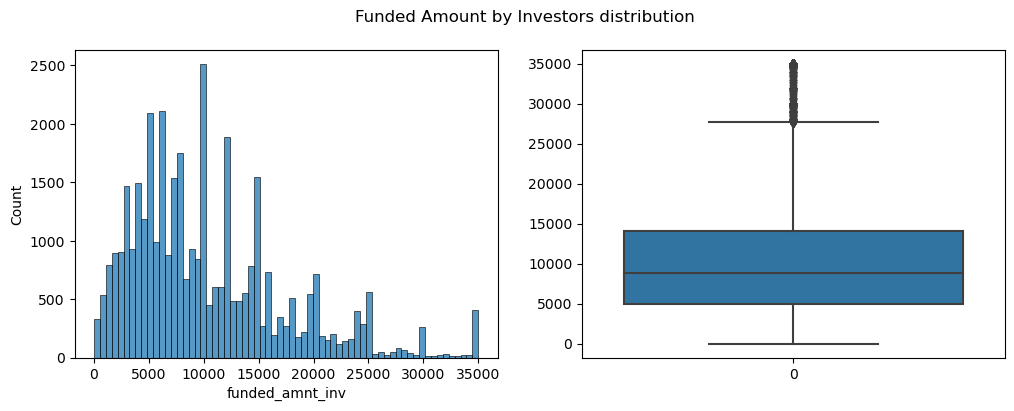

In [753]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.histplot(df["funded_amnt_inv"])
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=df.funded_amnt_inv)
#Single title for both subplots.
plt.suptitle('Funded Amount by Investors distribution')
plt.show()

Observations : Majority of the amount invested by investors is between 5000 and 10000 and very few in 25000 to 280000 and there is no amount invested between 30000 and 33000. No amount invested beyond 35000

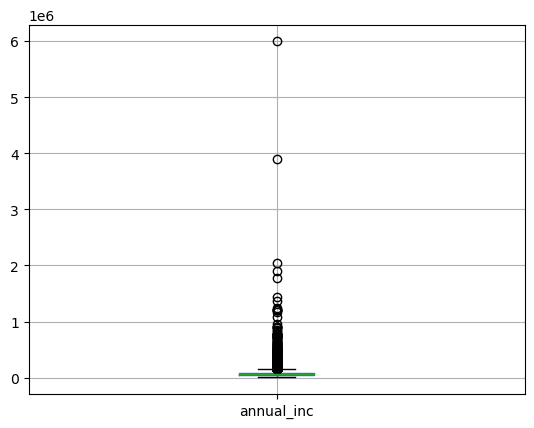

In [754]:
df.boxplot(column='annual_inc')
plt.show()

Annual Income seems to have outliers which needs to be removed. Annual Income can affect the loan amount to be provided

In [755]:
# Removing outliers from annual income using Inter quartile range
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['annual_inc'] >= Q1 - 1.5*IQR) & (df['annual_inc'] <= Q3 + 1.5*IQR)]

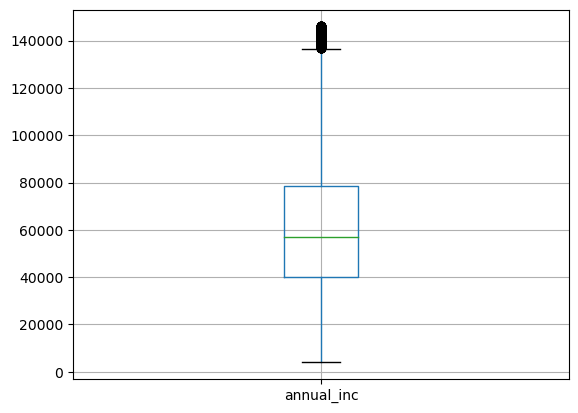

In [756]:
df.boxplot(column='annual_inc')
plt.show()

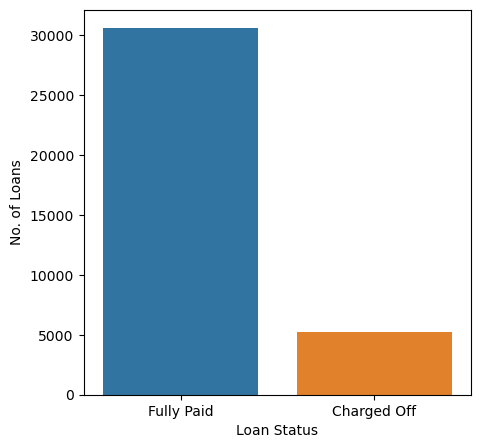

In [757]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="loan_status", data=df)
ax.set(xlabel='Loan Status', ylabel='No. of Loans')
plt.show()

We have remvoed current status as it does not effect the laodn status approval.
Also we observer majority of is full paid and there are around 5000 and odd numbers which charged off

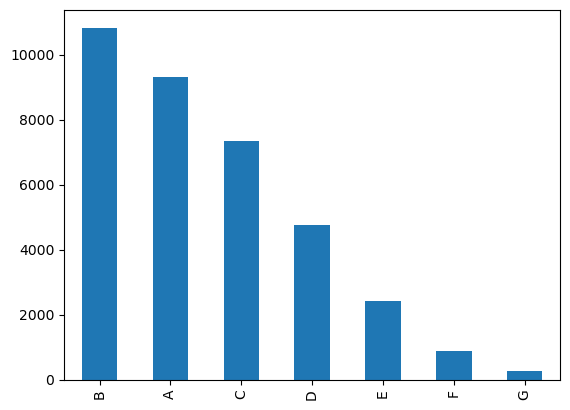

In [758]:
df['grade'].value_counts().plot(kind='bar')
plt.show()

Majority of grades of loan are of B type followed by a,c,d,e,f and g. G grade loan is the least here

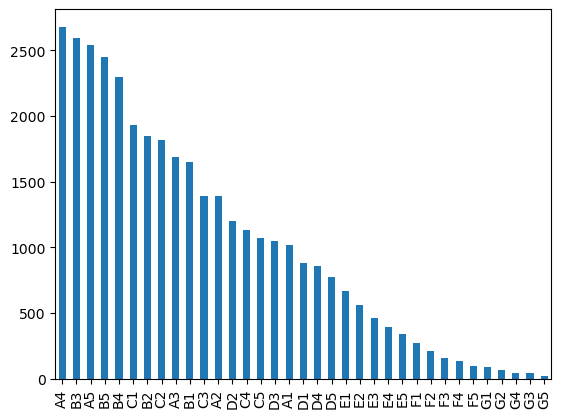

In [759]:
df['sub_grade'].value_counts().plot(kind='bar')
plt.show()

It follows similar pattern as above. A4 has the highest grade for approved loans.

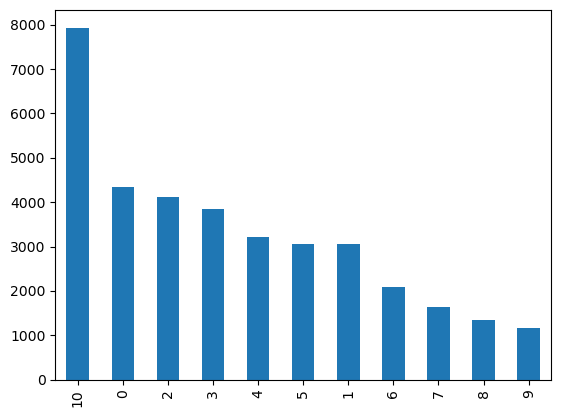

In [760]:
df['emp_length'].value_counts().plot(kind='bar')
plt.show()

Majority of the loan takes have employment length of 10 years or more. There are people whose employment tenure ie less than a year indicated by 0. Employment Tenure will also help banks decide whether to loan or not as this may indicate stability and more the tenure income will steadily increase.



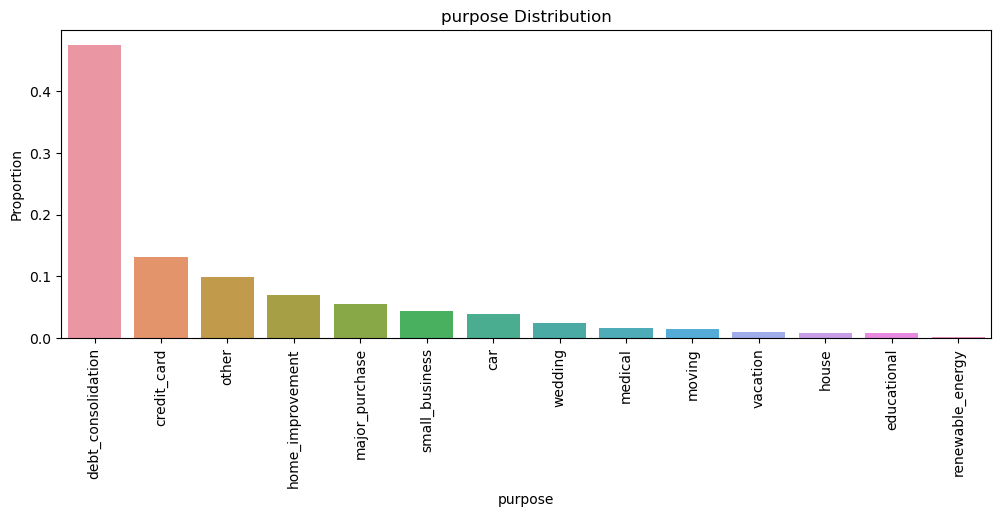

In [761]:
plt.figure(figsize=(12,4))
prob_df = df["purpose"].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='purpose', data=prob_df)
plt.xlabel('purpose')
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title('purpose'+' Distribution')
plt.show()

People who take loans for purpose deb_consolidation is highest and for renewablePenenrgy is the least

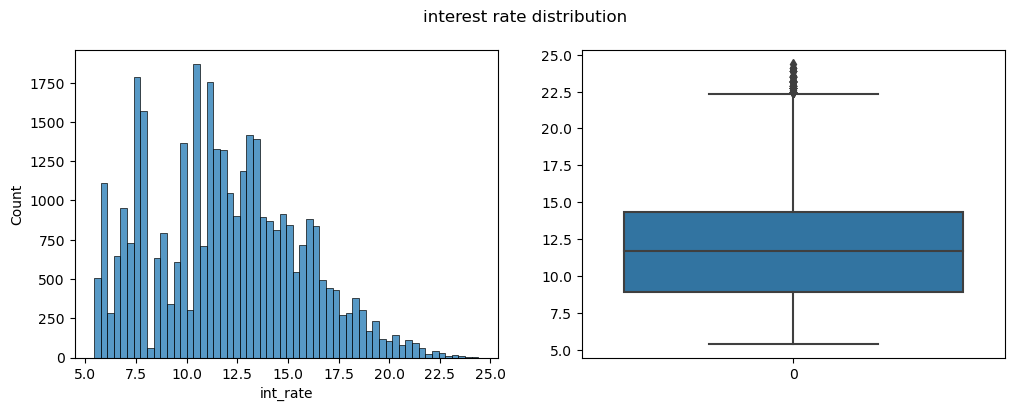

In [762]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df["int_rate"])
plt.subplot(1,2,2)
sns.boxplot(data=df.int_rate)
plt.suptitle('interest rate distribution')
plt.show(block=True)

It looks like interest rate frequency is highest soem where around 8 and 14 percent. The least number of interest rates occur after 22.5 percent. 

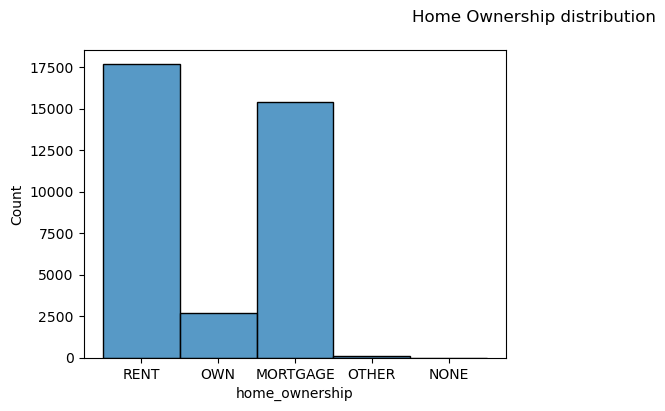

In [763]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df["home_ownership"])
plt.suptitle('Home Ownership distribution')
plt.show(block=True)

In home ownership Rent and Mortage frequency is more compared to other while Own house ownership is very less.


In [764]:
df.columns


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

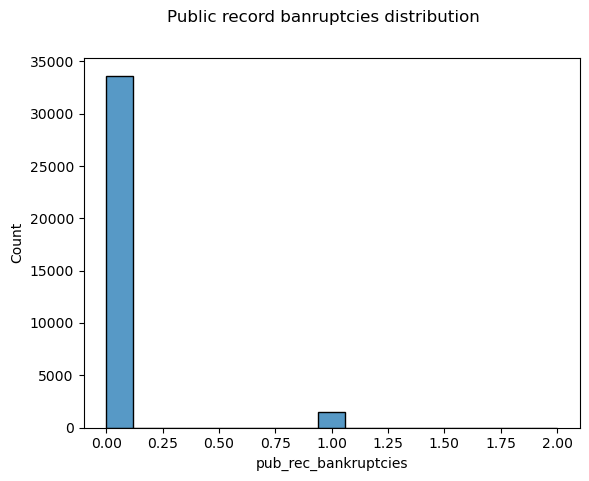

In [765]:
sns.histplot(df["pub_rec_bankruptcies"])
plt.suptitle('Public record banruptcies distribution')
plt.show()

Only 1% of people are bankrupt

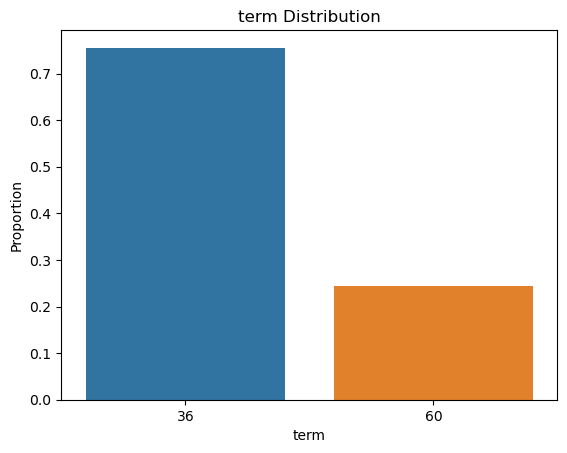

In [766]:
var = 'term'
prob_df = df[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

The most number of payments for the loan duration is 36 months

# Bivariate Analysis

In [767]:
df['annual_inc'].describe()

count     35814.000000
mean      61780.734054
std       28197.857345
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78688.000000
max      146000.000000
Name: annual_inc, dtype: float64

In [768]:
df['annual_inc'].median()


57000.0

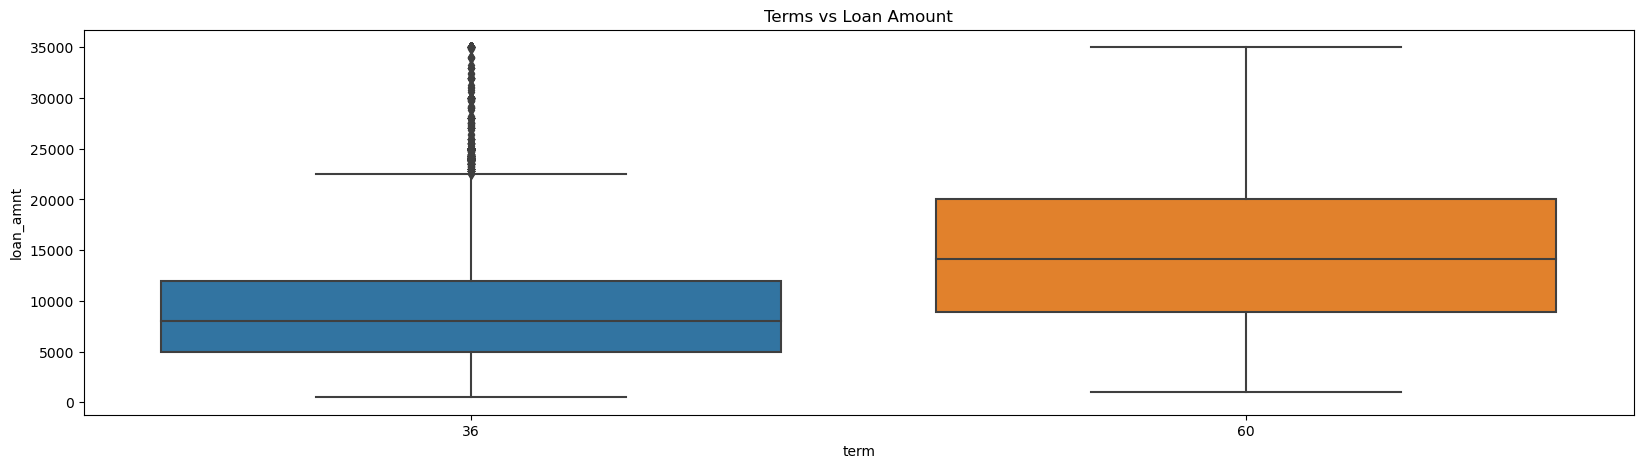

In [769]:
plt.figure(figsize=(20,5))
sns.boxplot(x='term', y=df.loan_amnt, data=df)
plt.title('Terms vs Loan Amount')
plt.show()

Higher amount of loan leads to higher duration of paying loan

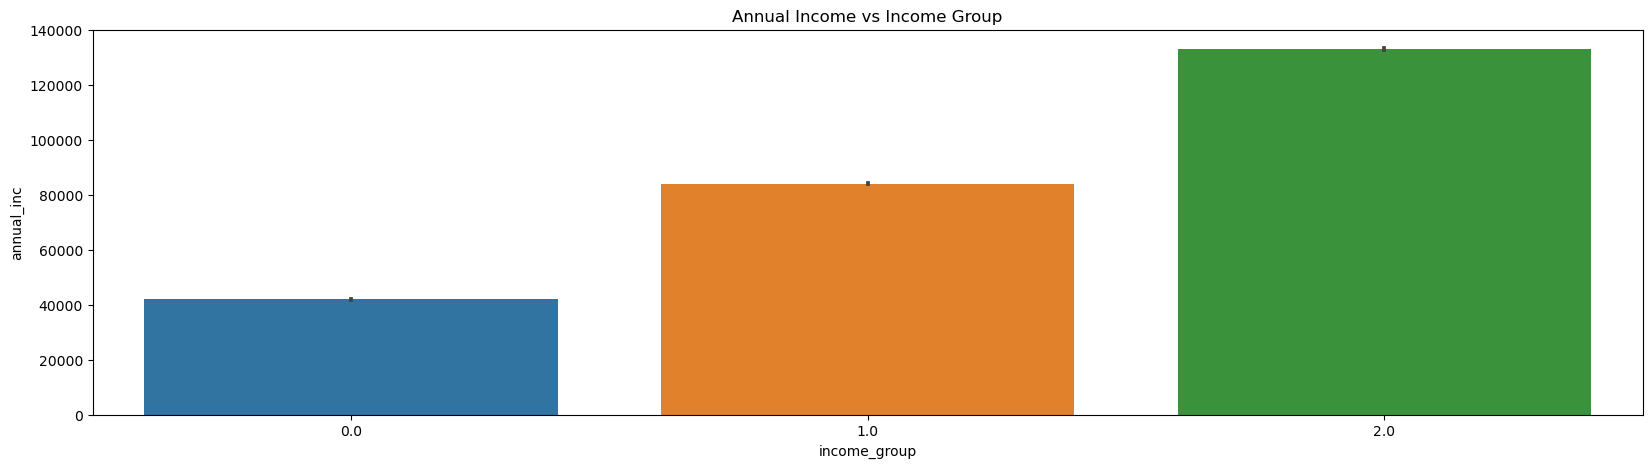

In [770]:
df['income_group'] = df['annual_inc'] // df['annual_inc'].mean()
plt.figure(figsize=(20,5))
# Create a segmented univariate plot of annual income vs income group
sns.barplot(data=df, x="income_group", y="annual_inc")
plt.title('Annual Income vs Income Group')
plt.show(block=True)

This shows that there are more number of people who have higher income. However with this alone it is difficult to come to conclusion on whether loan payer can pay or default

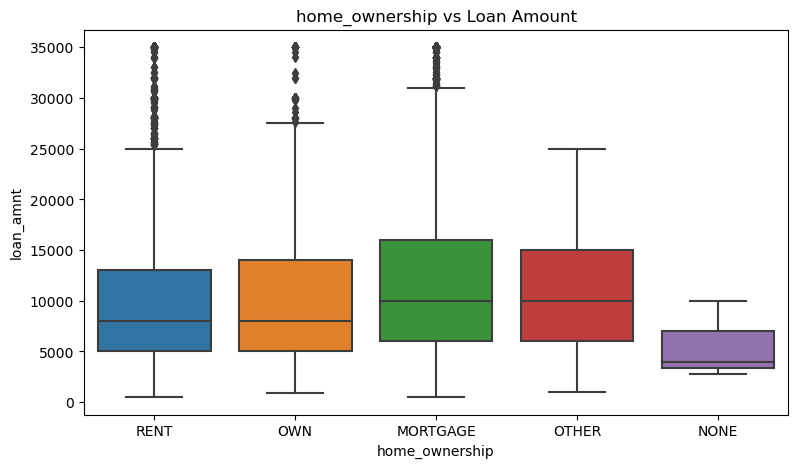

In [771]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=df.loan_amnt, data=df)
plt.title('home_ownership vs Loan Amount')
plt.show()

We can see that people whose owner ship is MORTGAGE hasve taken higher loan amount. having own house will get greater loan amount than rented ownership as own house could be asset for loan recovery. In case of mortage that is collateral so lenders has some gurantee on loan recovery. People who don't ahve any collateral do not get much loan amount

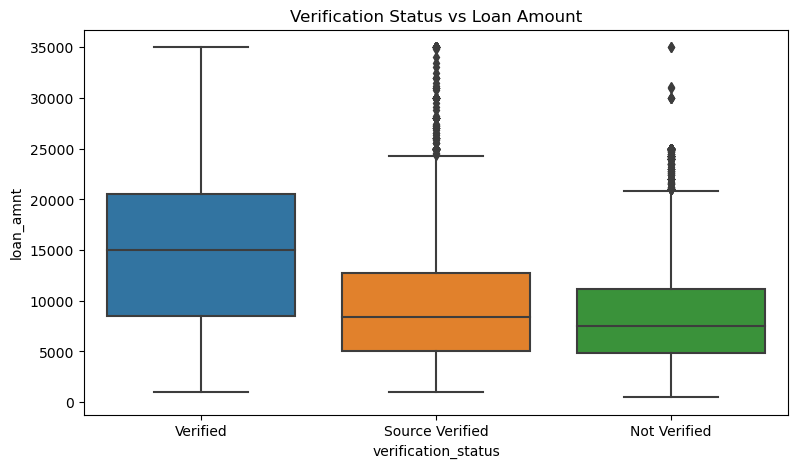

In [772]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y=df.loan_amnt, data=df)
plt.title('Verification Status vs Loan Amount')
plt.show()

If the income is verified by LC the loan amount given is higher. Even if source of income is verified the loan amount givne is higher compared to those not verified.

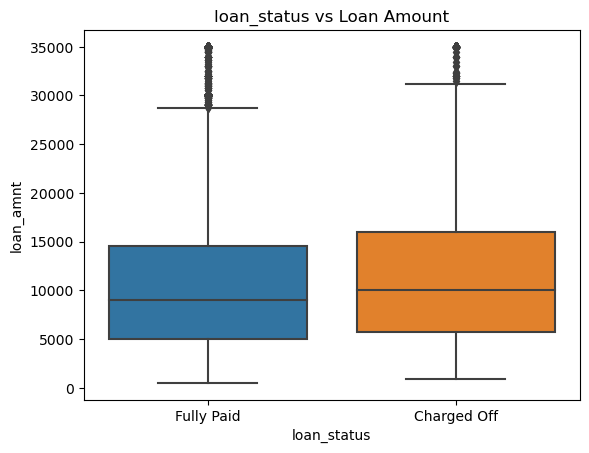

In [773]:
sns.boxplot(x='loan_status', y=df.loan_amnt, data=df)
plt.title('loan_status vs Loan Amount')
plt.show()

Charged Off has higher loan amoutn than fully paid

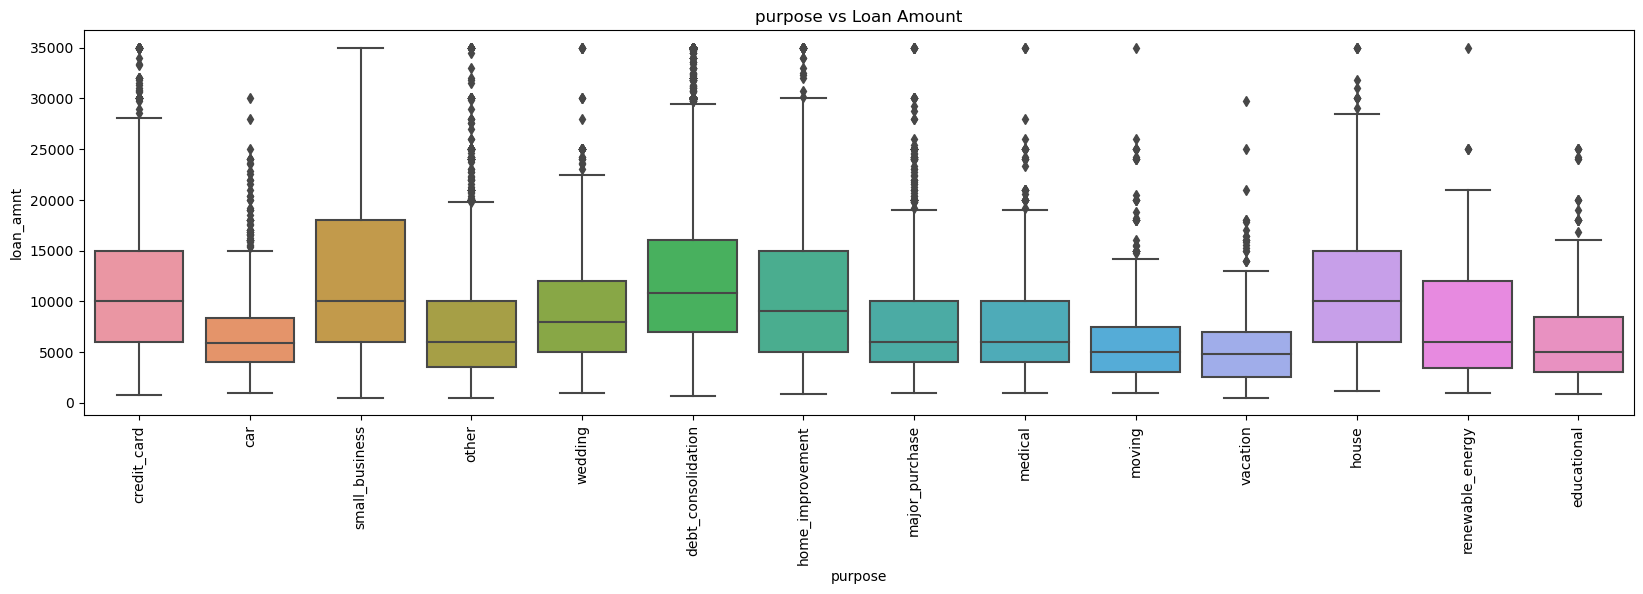

In [775]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=df.loan_amnt, data=df)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')
plt.show()

Small Business have taken higher loan amount

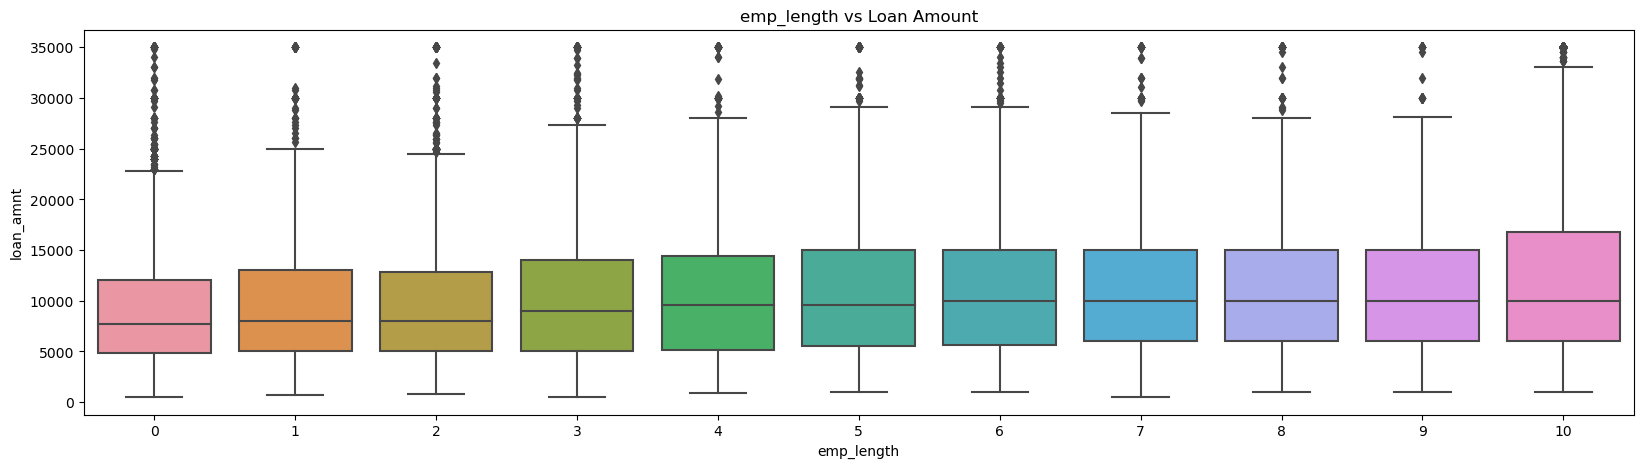

In [776]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=df.loan_amnt, data=df)
plt.title('emp_length vs Loan Amount')
plt.show()

Employment of 10 years or more are likely to taken more loan amount

Looking at the median it looks like with increase in employee length it is likely that loan amount increases

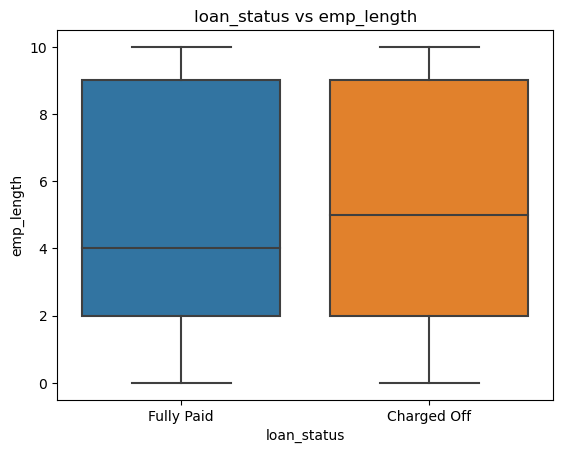

In [777]:
sns.boxplot(x='loan_status', y=df.emp_length, data=df)
plt.title('loan_status vs emp_length')
plt.show()

Looking at the box plot above the median increases in case of charged off indicating employee length can also affect how loan borrowers default. In this case the increase in employee tenure increases the risk of person becoming a defaulter.

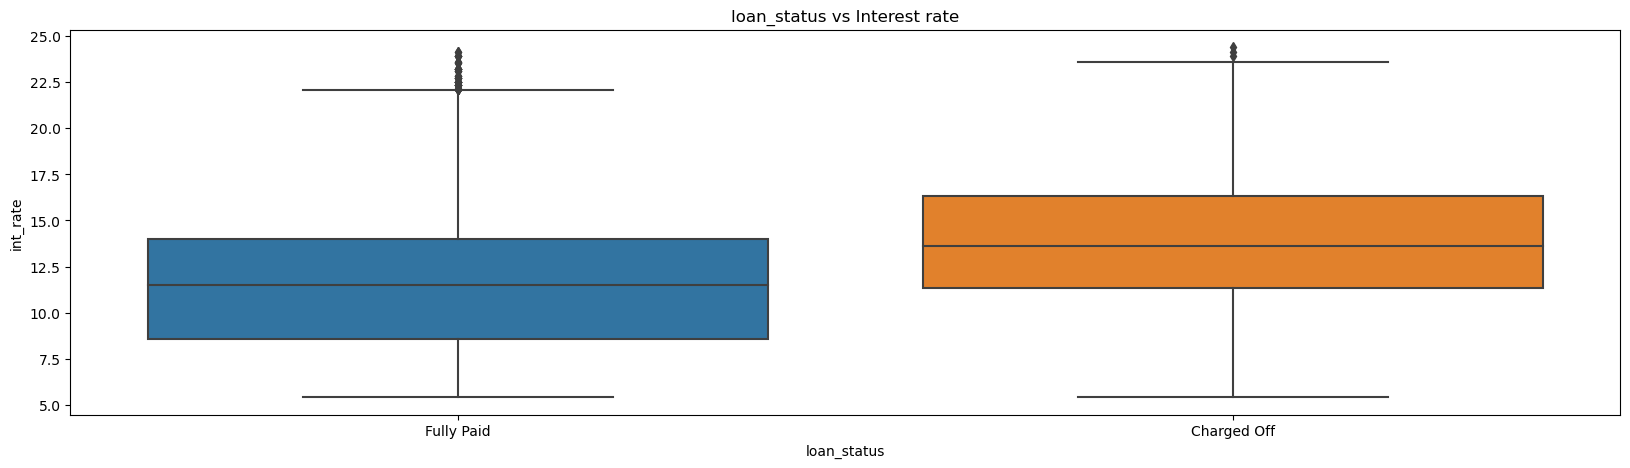

In [712]:
plt.figure(figsize=(20,5))
sns.boxplot(x='loan_status', y=df.int_rate, data=df)
plt.title('loan_status vs Interest rate')
plt.show()

Higher the interest rate more people are likely to tbe chared off.

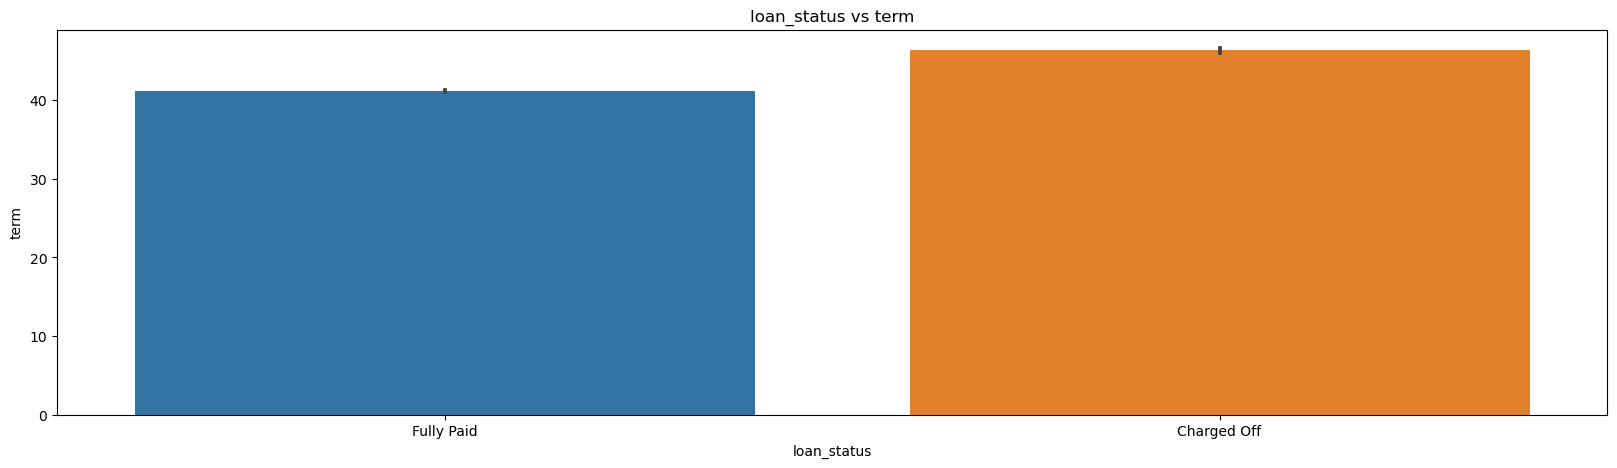

In [713]:
plt.figure(figsize=(20,5))
sns.barplot(x='loan_status', y=df.term, data=df)
plt.title('loan_status vs term')
plt.show()

As term increases more people are likely to default

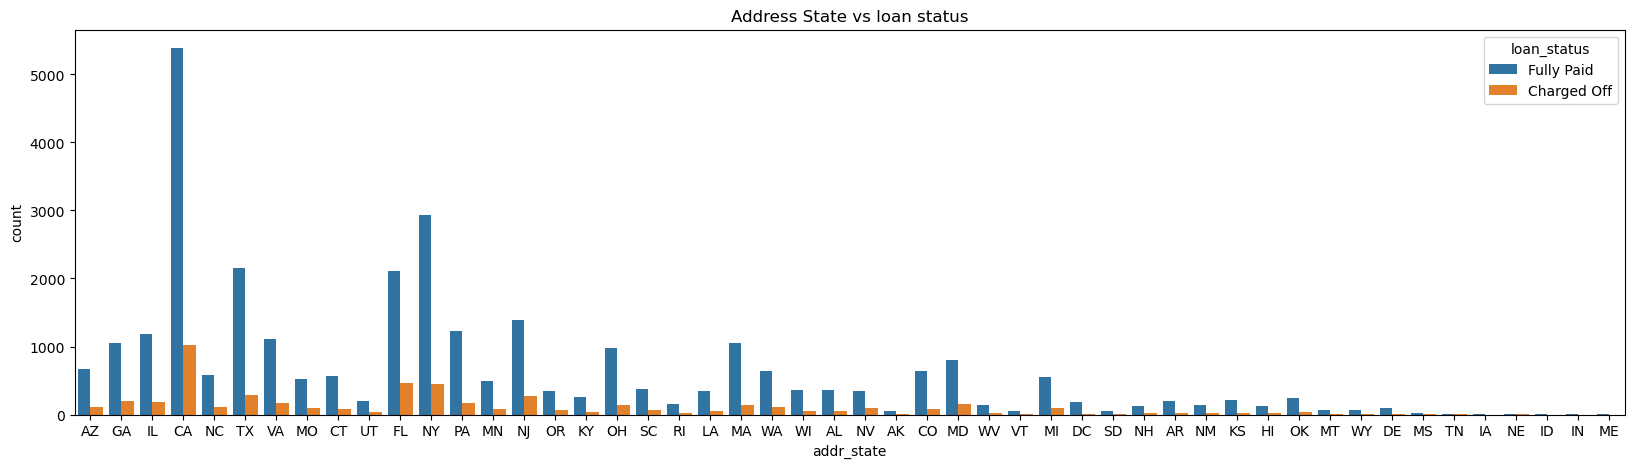

In [714]:
plt.figure(figsize=(20,5))
sns.countplot(x='addr_state', hue='loan_status', data=df)
plt.title('Address State vs loan status')
plt.show()

CA state has highest fully paid loan people. It also has highest charged off people. Also more loan borrowers from this state. Comapred to default fully loan paid is higher in this state. So also FL, NY, Nj and other states. So looks like lender is not at much risk as most people who take loans do repay compared to loan defaulters. 

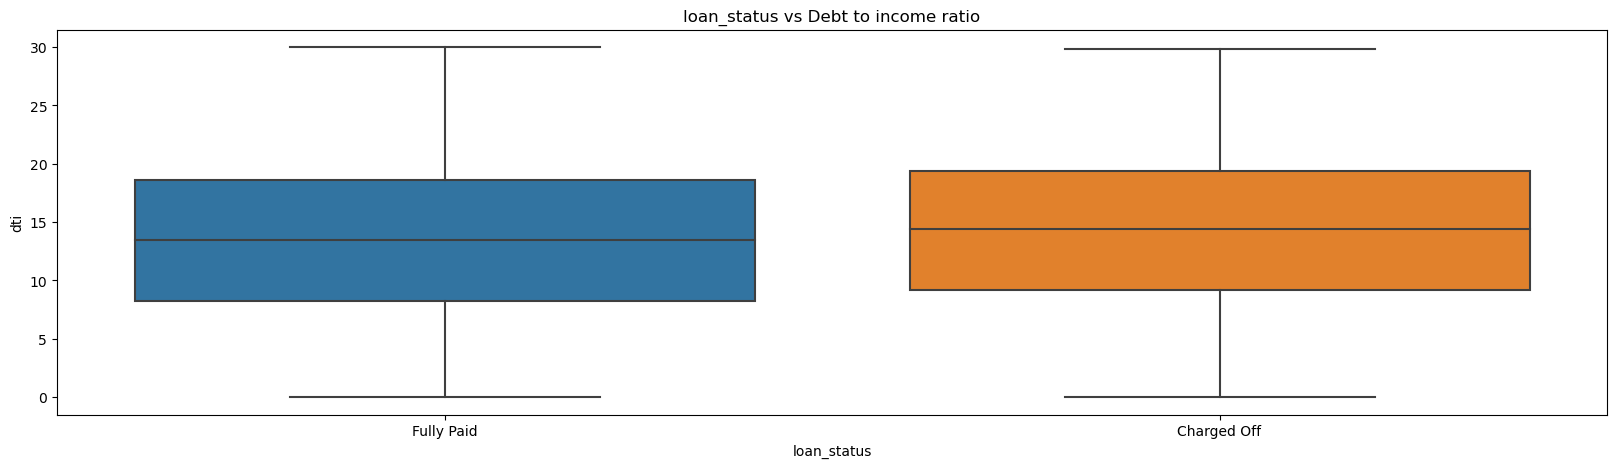

In [715]:
plt.figure(figsize=(20,5))
sns.boxplot(x='loan_status', y=df.dti, data=df)
plt.title('loan_status vs Debt to income ratio')
plt.show()

People with more debt to income ratio are more likely to default

In [716]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'income_group'],
      dtype='object')

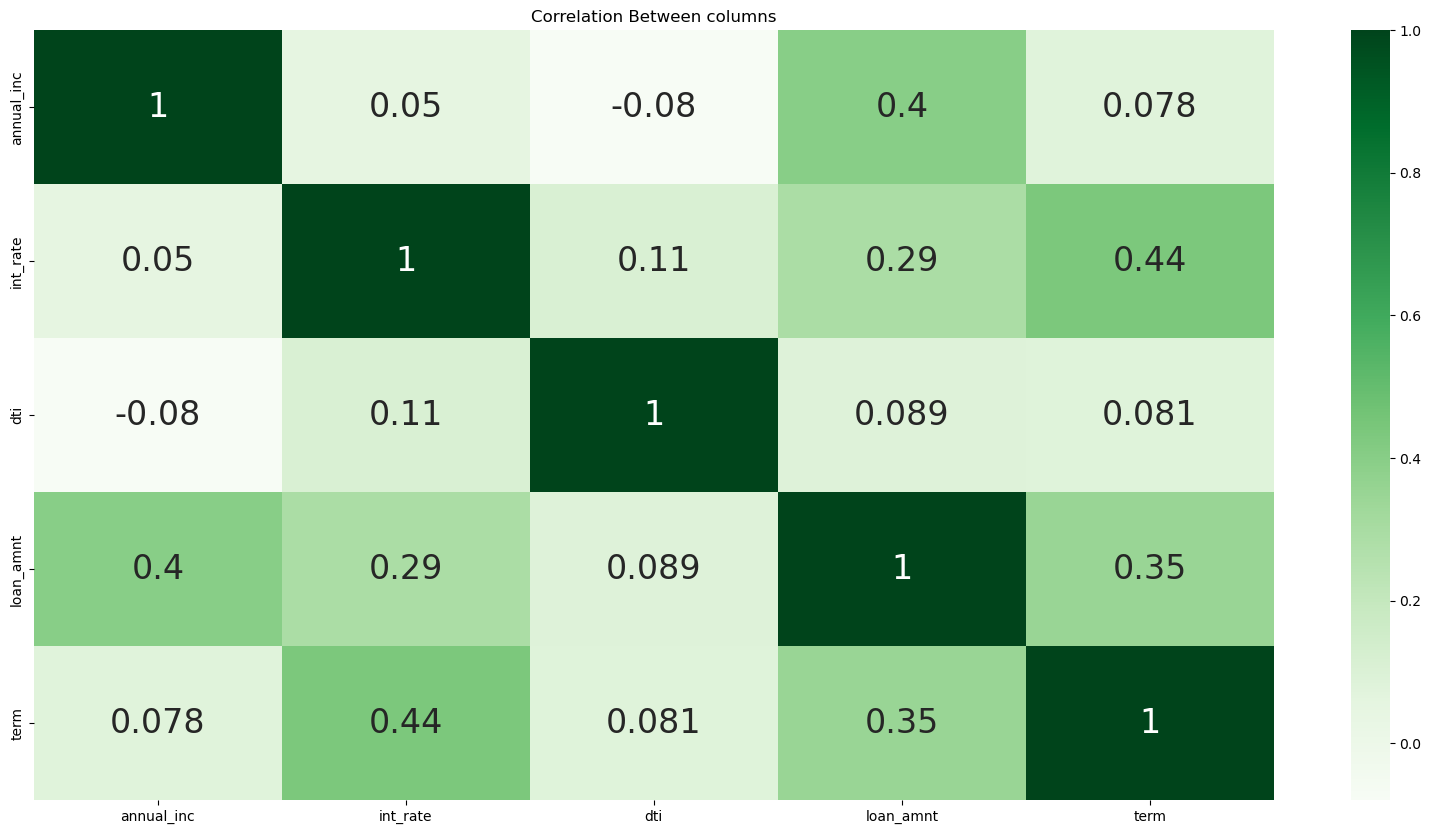

In [717]:
plt.figure(figsize=(20,10))
corr = df[[ 'annual_inc', 'int_rate', 'dti','loan_amnt','term']].corr()
sns.heatmap(corr,cmap='Greens', annot=True,annot_kws={"size": 24})
plt.title("Correlation Between columns")
plt.show()

Annual Income and debt to income ratio has a negative co-relation. If annual income increases then loan amount approved also increases. Higher loan amount take longer to be repaid, hence the term increased for loan amount. The interest rate also increases with term.